In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.draw()

q_0: 
     
q_1: 
     
q_2:

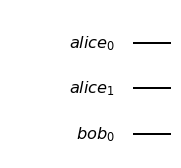

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
alice_reg = QuantumRegister(2, name="alice")
bob_reg = QuantumRegister(1, name="bob")
qc = QuantumCircuit(alice_reg, bob_reg)
qc.draw(output='mpl')

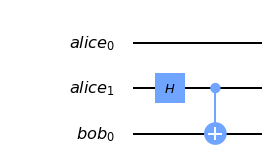

In [3]:
qc.h(alice_reg[1]) #applies a H gate on Alice's second qubit
qc.cx(alice_reg[1], bob_reg[0])#applies a CX with Alice's second qubit as control and Bob's first as target
qc.draw(output='mpl')

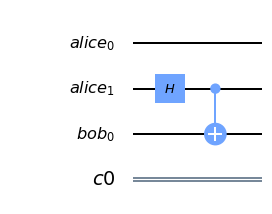

In [4]:
from qiskit import ClassicalRegister
#alice_bell_class_reg = ClassicalRegister(1)
#qc.add_register(alice_bell_class_reg)
bob_class_reg = ClassicalRegister(1)
qc.add_register(bob_class_reg)
qc.draw(output='mpl')

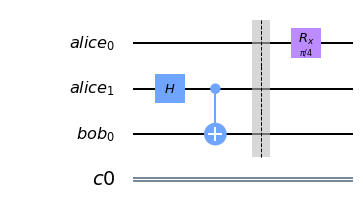

In [5]:
from math import pi
qc.barrier()
qc.rx(pi/4, alice_reg[0]) #use any angle you wish
#alice_psi_class_reg = ClassicalRegister(1)
#qc.add_register(alice_psi_class_reg)
qc.draw(output='mpl')

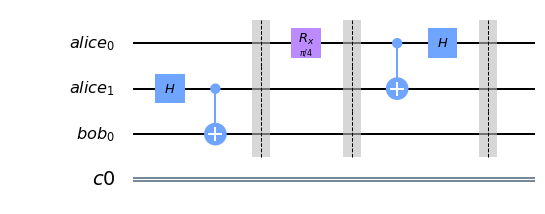

In [6]:
qc.barrier()
qc.cx(alice_reg[0], alice_reg[1])
qc.h(alice_reg[0])
qc.barrier()
qc.draw(output='mpl')

In [7]:
qc.cx(alice_reg[1], bob_reg[0])
qc.cz(alice_reg[0], bob_reg[0])

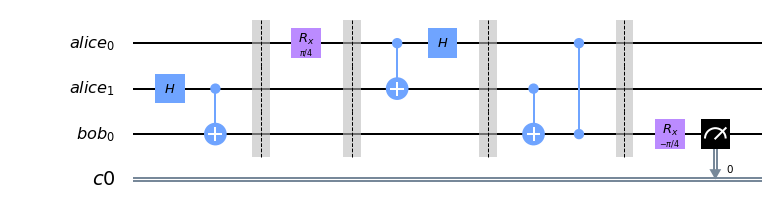

In [8]:
qc.barrier()
qc.rx(-pi/4, bob_reg[0])
qc.measure(bob_reg[0], bob_class_reg)
qc.draw(output='mpl')

In [9]:
from qiskit import IBMQ
#IBMQ.save_account('YOUR KEY')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
#provider.backends()

In [10]:
# get the least-busy backend at IBM and run the quantum circuit there
from qiskit import execute
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(simulator=False))
print(backend)
job_exp = execute(qc, backend=backend, shots=1024)
exp_result = job_exp.result()

exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)

ibmqx2
{'1': 80, '0': 944}


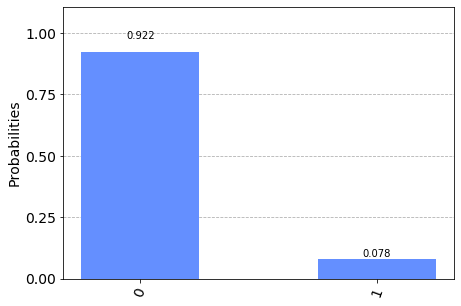

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(exp_measurement_result)